In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from patsy import dmatrices

import seaborn as sns

In [2]:
! pip install stargazer

In [3]:
from stargazer.stargazer import Stargazer

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
df = pd.read_excel('/content/drive/MyDrive/2017-2018.xlsx')
#df = pd.read_excel('G:/HFEA/2017-2018.xlsx')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169616 entries, 0 to 169615
Data columns (total 61 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Patient Age at Treatment                               169616 non-null  object 
 1   Total Number of Previous IVF cycles                    169616 non-null  object 
 2   Total Number of Previous DI cycles                     169616 non-null  object 
 3   Total number of previous pregnancies, Both IVF and DI  42688 non-null   float64
 4   Total number of previous live births - IVF or DI       105087 non-null  object 
 5   Cause  of Infertility - Tubal disease                  169616 non-null  int64  
 6   Cause of Infertility - Ovulatory Disorder              169616 non-null  int64  
 7   Cause of Infertility - Male Factor                     169616 non-null  int64  
 8   Cause of Infertility - Patient Une

In [7]:
df.columns

Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of previous live births - IVF or DI',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Main Reason for Producing Embroys Storing Eggs', 'Stimulation used',
       'Egg Donor Age at Registration', 'Sperm Donor Age at Registration',
       'Donated embryo', 'Type of treatment - IVF or DI',
       'Specific treatment type', 'PGD treatment', 'PGS Treatment',
       'Elective Single Embryo Transfer', 'Egg Source', 'Sperm From',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed', 'Total Embryos Created',
       'Embryos

In [8]:
df['Live Birth Occurrence'].fillna(0,inplace = True)

In [9]:
df['Frozen Cycle'].value_counts()

Frozen Cycle
0.0    108716
1.0     49618
Name: count, dtype: int64

In [10]:
df['Specific treatment type'].unique()

array(['ICSI', 'IVF', 'Unknown', 'DI', 'ICSI:IVF', 'ICSI:Unknown',
       'IVF:Unknown'], dtype=object)

In [11]:
df['Heart One Birth Weight'].value_counts()

Heart One Birth Weight
Between 3.0kg and 3.49Kg    14630
Between 3.5kg and 3.99Kg    10179
Between 2.5kg and 2.99Kg     7241
Between 2.0kg and 2.49Kg     3067
Between 4.0kg and 4.49Kg     2779
Between 1.5kg and 1.99Kg     1048
Between 1kg and 1.49Kg        527
Between 4.5kg and 4.99Kg      420
Less than 1kg                 285
Between 5.0kg and 5.49Kg       56
5.5kg or greater               27
Name: count, dtype: int64

In [12]:
weight_map = {
    'Between 3.0kg and 3.49Kg': 3.0,
    'Between 3.5kg and 3.99Kg': 3.5,
    'Between 2.5kg and 2.99Kg': 2.5,
    'Between 2.0kg and 2.49Kg': 2.0,
    'Between 4.0kg and 4.49Kg': 4.0,
    'Between 1.5kg and 1.99Kg': 1.5,
    'Between 1kg and 1.49Kg': 1.0,
    'Between 4.5kg and 4.99Kg': 4.5,
    'Less than 1kg': 0.5,
    'Between 5.0kg and 5.49Kg': 5.0,
    '5.5kg or greater': 5.5,
}

# use the dictionary to map the "Heart One Birth Weight" values to the lower bound
df['Birth Weight Lower Bound'] = df['Heart One Birth Weight'].map(weight_map)

In [13]:
df['Birth Weight Lower Bound'].fillna(0,inplace = True)

In [14]:
df['is_ICSI'] = df['Specific treatment type'].str.contains('ICSI')

In [15]:
df['PGT'] = (df['PGD treatment']+ df['PGS Treatment'])>=1

In [16]:
df[['Frozen Cycle','Fresh Cycle','Stimulation used', 'PGT' ]].corr()

,Frozen Cycle,Fresh Cycle,Stimulation used,PGT
Frozen Cycle,1.000000,-0.998915,-0.885392,0.184056
Fresh Cycle,-0.998915,1.000000,0.885057,-0.183833
Stimulation used,-0.885392,0.885057,1.000000,-0.152649
PGT,0.184056,-0.183833,-0.152649,1.000000


In [17]:
df['Sperm Donor Age at Registration']

0         Between 36 and 40
1                       NaN
2                       NaN
3                       NaN
4                       NaN
                ...        
169611                  NaN
169612                  NaN
169613                  NaN
169614                  NaN
169615                  NaN
Name: Sperm Donor Age at Registration, Length: 169616, dtype: object

In [18]:
df['Sperm From'].value_counts()

Sperm From
Partner    144639
Donor       24782
Name: count, dtype: int64

In [19]:
df = df[df['Sperm From'] == 'Partner' ]

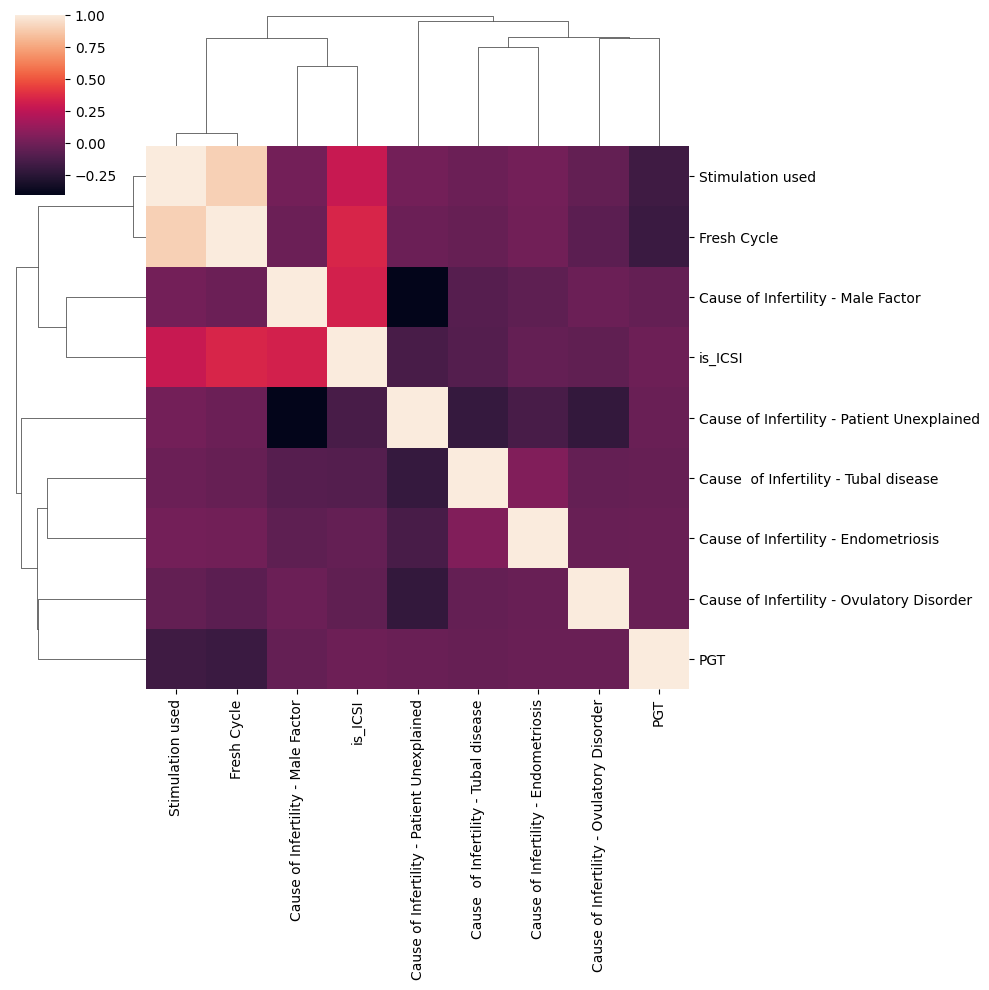

In [20]:
sns.clustermap(df[[x for x in df.columns if 'Cause' in x]+['PGT','Stimulation used','is_ICSI','Fresh Cycle']].corr())

In [21]:
df['Stimulation used'].fillna(0,inplace = True)

In [22]:
df['Number of foetal sacs with fetal pulsation'].unique()

array([nan, 1, 2, 0, 3, '>3'], dtype=object)

In [23]:
df['Number of Live Births'].unique()

array([0, 1, 2, 3])

In [24]:
df['Heart One Birth Outcome'].value_counts()

Heart One Birth Outcome
Live  Birth                       35175
Miscarriage                        4619
Lost to Follow Up                   367
Termination                         302
Still Birth                         126
Ectotopic/Hetrotopic Pregnancy       40
Embryo Reduction                     35
Name: count, dtype: int64

In [25]:
df['Heart One Birth Outcome'].unique()

array([nan, 'Live  Birth', 'Miscarriage', 'Lost to Follow Up',
       'Still Birth', 'Termination', 'Ectotopic/Hetrotopic Pregnancy',
       'Embryo Reduction'], dtype=object)

In [26]:
df['Heart One Success Birth'] = (df['Heart One Birth Outcome']=='Live  Birth')

In [27]:
df['Early Outcome'] = df['Early Outcome'].astype('str')
df['Early Outcome'].value_counts()

Early Outcome
nan                                  91524
Intrauterine Fetal Pulsation Seen    40458
Biochemical Pregnancy Only            7882
Miscarriage                           4300
Ectopic/Hetrotopic                     475
Name: count, dtype: int64

In [28]:
df['is_Pulsation'] = df['Early Outcome'].apply(lambda x: x.strip() == 'Intrauterine Fetal Pulsation Seen')

In [29]:
df['Heart One Birth Congenital Abnormalities'].fillna(0,inplace=True)

In [30]:
for col in [x for x in df.columns if 'date' in x.lower()]:
    print(col,df[col].unique())

Date of Embryo Transfer [ nan   5.   0.   3.   2.   1.   6.   4.   7. 999.]
Heart One Delivery Date [  nan 2019. 2017. 2018.]
Heart Two Delivery Date [  nan 2018. 2019. 2017.]
Heart Three Delivery Date [  nan 2018. 2019. 2017.]


In [31]:
df['Date of Embryo Transfer'].fillna(0, inplace = True)
df['Date of Embryo Transfer'] = df['Date of Embryo Transfer'].apply(lambda x: 0 if x==999. else x)

In [32]:
for col in [x for x in df.columns if 'eggs' in x.lower()]:
    print(col,df[col].unique())

Main Reason for Producing Embroys Storing Eggs ['Donation' 'Treatment - IVF' 'Embryo storage' 'Egg storage' 'Egg share'
 'Undefined']
Eggs Thawed [0 1]
Fresh Eggs Collected ['21-25' '1-5' 0 '11-15' '6-10' '16-20' '26-30' '>40' '31-35' '36-40']
Fresh Eggs Stored [0 1]
Total Eggs Mixed [0 '1-5' '11-15' '6-10' '16-20' '21-25' '26-30' '>40' '31-35' '36-40']
Embryos Transfered from Eggs Micro-injected [ 0.  1. nan  2.  3.]


In [33]:
df['Embryos Transfered from Eggs Micro-injected'].fillna(0, inplace = True)

In [34]:
df['is_PatientEgg'] = (df['Egg Source'] =='Patient')

In [35]:
for col in [x for x in df.columns if 'Embryos' in x]:
    print(col,df[col].unique())

Total Embryos Created [0 '1-5' '6-10' '11-15' '16-20' '>30' '21-25' '26-30']
Embryos Transfered [0. 1. 2. 3.]
Total Embryos Thawed [0 '1-5' '6-10' '>10']
Embryos Transfered from Eggs Micro-injected [0. 1. 2. 3.]
Embryos Stored For Use By Patient [0 '1-5' '6-10' '11-15' '16-20' '>20']


In [36]:
df['Partner age'].value_counts()

Partner age
18-34    41773
35-37    28457
40-42    19546
38-39    18010
45-50    14297
43-44     9567
51-55     3743
56-60     1212
>60        629
999          4
Name: count, dtype: int64

In [37]:
df = df[df['Partner age'] != 999]

In [38]:
df.pivot_table(index=['Partner age'], columns=['is_ICSI','Fresh Cycle'], values='is_Pulsation', aggfunc= np.mean)

is_ICSI         False               True           
Fresh Cycle       0.0       1.0       0.0       1.0
Partner age                                        
18-34        0.391115  0.294011  0.374677  0.325445
35-37        0.375150  0.268662  0.359036  0.293238
38-39        0.353167  0.242217  0.325117  0.257237
40-42        0.332733  0.211057  0.345763  0.247845
43-44        0.327351  0.190180  0.322660  0.213708
45-50        0.321429  0.175935  0.297170  0.218947
51-55        0.290928  0.145858  0.380435  0.208262
56-60        0.347682  0.162281  0.349206  0.208401
>60          0.371795  0.093023  0.307692  0.166667

In [39]:
df.pivot_table(index=['Partner age'], columns=['is_ICSI','Fresh Cycle'], values='Heart One Success Birth', aggfunc= np.mean)

is_ICSI         False               True           
Fresh Cycle       0.0       1.0       0.0       1.0
Partner age                                        
18-34        0.347934  0.265578  0.337468  0.294565
35-37        0.324561  0.235597  0.329317  0.258026
38-39        0.304031  0.206046  0.275822  0.222344
40-42        0.282832  0.175285  0.298305  0.208190
43-44        0.276239  0.156293  0.251232  0.175661
45-50        0.264077  0.145096  0.254717  0.183677
51-55        0.241919  0.115519  0.304348  0.180723
56-60        0.294702  0.122807  0.253968  0.174475
>60          0.282051  0.081395  0.256410  0.132184

In [40]:
df[df['Heart One Success Birth']==1].pivot_table(index=['Partner age'], columns=['is_ICSI','Fresh Cycle'], values='Heart One Birth Congenital Abnormalities', aggfunc= np.mean)

is_ICSI         False               True           
Fresh Cycle       0.0       1.0       0.0       1.0
Partner age                                        
18-34        0.011515  0.009681  0.003063  0.009490
35-37        0.005553  0.010466  0.007317  0.012830
38-39        0.010101  0.011354  0.017021  0.012667
40-42        0.011465  0.011132  0.007576  0.015183
43-44        0.015537  0.011062  0.000000  0.007680
45-50        0.009872  0.013937  0.024691  0.014842
51-55        0.000000  0.010101  0.000000  0.009524
56-60        0.011236  0.000000  0.062500  0.009259
>60          0.000000  0.000000  0.000000  0.043478

In [41]:
df[df['Heart One Success Birth']==1].pivot_table(index=['Partner age'], columns=['is_ICSI','Elective Single Embryo Transfer'], values='Heart One Birth Congenital Abnormalities', aggfunc= np.mean)

is_ICSI                             False               True           
Elective Single Embryo Transfer       0.0       1.0       0.0       1.0
Partner age                                                            
18-34                            0.010120  0.011060  0.008596  0.008738
35-37                            0.007822  0.007582  0.011905  0.012227
38-39                            0.008742  0.012882  0.015855  0.010349
40-42                            0.011333  0.011324  0.010183  0.019152
43-44                            0.010955  0.017274  0.004357  0.010204
45-50                            0.012712  0.009331  0.011004  0.023392
51-55                            0.000000  0.006452  0.009756  0.006024
56-60                            0.015385  0.000000  0.024096  0.000000
>60                              0.000000  0.000000  0.027027  0.052632

In [42]:
df[df['Heart One Success Birth']==1].pivot_table(index=['Partner age'], columns=['is_ICSI','Fresh Cycle'], values='Birth Weight Lower Bound', aggfunc= np.mean)

is_ICSI         False               True           
Fresh Cycle       0.0       1.0       0.0       1.0
Partner age                                        
18-34        2.993987  2.886674  3.052067  2.889428
35-37        3.019252  2.876546  3.031707  2.890747
38-39        3.030934  2.895633  3.068085  2.850457
40-42        3.004459  2.852968  3.015152  2.879917
43-44        3.048729  2.863938  2.936275  2.910906
45-50        3.058243  2.882404  3.040123  2.832560
51-55        2.963362  2.818182  2.928571  2.898413
56-60        2.988764  2.982143  2.937500  2.824074
>60          3.159091  2.357143  3.100000  2.934783

In [43]:
df = df[df['Egg Source'] == 'Patient']

In [44]:
df.shape

(138280, 67)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138280 entries, 1 to 169615
Data columns (total 67 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Patient Age at Treatment                               138280 non-null  object 
 1   Total Number of Previous IVF cycles                    138280 non-null  object 
 2   Total Number of Previous DI cycles                     138280 non-null  object 
 3   Total number of previous pregnancies, Both IVF and DI  27255 non-null   float64
 4   Total number of previous live births - IVF or DI       82260 non-null   object 
 5   Cause  of Infertility - Tubal disease                  138280 non-null  int64  
 6   Cause of Infertility - Ovulatory Disorder              138280 non-null  int64  
 7   Cause of Infertility - Male Factor                     138280 non-null  int64  
 8   Cause of Infertility - Patient Unexplai

In [46]:
df['Date of Embryo Transfer'].unique()

array([0., 5., 3., 2., 1., 6., 4., 7.])

In [47]:
df.columns

Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of previous live births - IVF or DI',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Main Reason for Producing Embroys Storing Eggs', 'Stimulation used',
       'Egg Donor Age at Registration', 'Sperm Donor Age at Registration',
       'Donated embryo', 'Type of treatment - IVF or DI',
       'Specific treatment type', 'PGD treatment', 'PGS Treatment',
       'Elective Single Embryo Transfer', 'Egg Source', 'Sperm From',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed', 'Total Embryos Created',
       'Embryos

In [48]:
df['Live Birth Occurrence'].unique()

array([0, 1])

In [49]:
df['Early Outcome'].unique()

array(['nan', 'Intrauterine Fetal Pulsation Seen', 'Miscarriage',
       'Ectopic/Hetrotopic', 'Biochemical Pregnancy Only'], dtype=object)

In [50]:
df = df[df['Partner Type'] == 'Male']

In [51]:
df.shape

(132524, 67)

In [52]:
df['Live Birth Occurrence'] = df['Live Birth Occurrence'].astype('category')
df['is_Pulsation'] = df['is_Pulsation'].astype('category')
df['Partner age'] = df['Partner age'].astype('category')
df['Patient ethnicity'] = df['Patient ethnicity'].astype('category')
df['Partner ethnicity'] = df['Partner ethnicity'].astype('category')

<ipython-input-52-0a0160a4bb33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Live Birth Occurrence'] = df['Live Birth Occurrence'].astype('category')
<ipython-input-52-0a0160a4bb33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_Pulsation'] = df['is_Pulsation'].astype('category')
<ipython-input-52-0a0160a4bb33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [53]:
def stargazer_fit(result):
  p_values = result.pvalues
  significant_vars = p_values[p_values < 0.05].index.tolist()
  star = Stargazer([result])
  star.covariate_order(significant_vars)
  return star

In [54]:
# df= df.dropna(subset=['Partner age', 'Patient ethnicity', 'Partner ethnicity'])

In [55]:
formula_live_birth = 'Q("Live Birth Occurrence") ~ Q("Partner age")'

formula_pulsation = 'Q("is_Pulsation") ~ Q("Partner age")'

In [56]:
y_live_birth, X_live_birth = dmatrices(formula_live_birth, df, return_type='dataframe')
y_pulsation, X_pulsation = dmatrices(formula_pulsation, df, return_type='dataframe')

In [57]:
model_live_birth = sm.Logit(y_live_birth.iloc[:,1], X_live_birth)
result_live_birth = model_live_birth.fit()

Optimization terminated successfully.
         Current function value: 0.563790
         Iterations 5


In [58]:
print(result_live_birth.summary())

                                 Logit Regression Results                                
Dep. Variable:     Q("Live Birth Occurrence")[1]   No. Observations:               130431
Model:                                     Logit   Df Residuals:                   130422
Method:                                      MLE   Df Model:                            8
Date:                           Wed, 17 Jul 2024   Pseudo R-squ.:                0.009271
Time:                                   22:48:05   Log-Likelihood:                -73536.
converged:                                  True   LL-Null:                       -74224.
Covariance Type:                       nonrobust   LLR p-value:                7.613e-292
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.8149      0.011    -75.720      0.000      -0.836      -0.79

In [ ]:
stargazer_fit(result_live_birth)

In [ ]:
model_pulsation = sm.Logit(y_pulsation.iloc[:,1], X_pulsation)
result_pulsation = model_pulsation.fit()

Optimization terminated successfully.
         Current function value: 0.598524
         Iterations 5


In [ ]:
print(result_pulsation.summary())

                              Logit Regression Results                             
Dep. Variable:     Q("is_Pulsation")[True]   No. Observations:               130431
Model:                               Logit   Df Residuals:                   130422
Method:                                MLE   Df Model:                            8
Date:                     Fri, 12 Jul 2024   Pseudo R-squ.:                0.007267
Time:                             23:07:52   Log-Likelihood:                -78066.
converged:                            True   LL-Null:                       -78638.
Covariance Type:                 nonrobust   LLR p-value:                2.024e-241
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.6748      0.010    -64.287      0.000      -0.695      -0.654
Q("Partner age")[T.35-37]    -0.1184      0.01

In [ ]:
stargazer_fit(result_pulsation)

## Controlled for female patient age

In [ ]:
sorted(df['Patient Age at Treatment'].unique())

['18-34', '35-37', '38-39', '40-42', '43-44', '45-50']

In [ ]:
l1 = {}
l2 = {}
for value in sorted(df['Patient Age at Treatment'].unique()):
  if value != 999:
    df_analysis = df[df['Patient Age at Treatment'] == value]

    formula_birth = 'Q("Live Birth Occurrence") ~ Q("Partner age")'

    formula_pulsation = 'Q("is_Pulsation") ~ Q("Partner age")'

    y_birth, X_birth = dmatrices(formula_birth, df_analysis, return_type='dataframe')
    y_pulsation, X_pulsation = dmatrices(formula_pulsation, df_analysis, return_type='dataframe')



    try:
      model_birth = sm.Logit(y_birth.iloc[:,1], X_birth)
      result_birth = model_birth.fit()
      l1[value] = result_birth
    except:
      pass

    try:
      model_pulsation = sm.Logit(y_pulsation.iloc[:,1], X_birth)
      result_pulsation = model_pulsation.fit()
      l2[value] = result_pulsation
    except:
      pass

Optimization terminated successfully.
         Current function value: 0.626964
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.648143
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.589785
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.622940
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.520362
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566119
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.414659
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.477712
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.214646
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.289805
  

In [ ]:
table1 = Stargazer([item for key, item in l1.items()])
table1.custom_columns(list(l1.keys()))
table1

In [ ]:
table2 = Stargazer([item for key, item in l2.items()])
table2.custom_columns(list(l2.keys()))
table2

## Controlled for infertility causes

In [ ]:
infertility_type = [col for col in df.columns if 'Infertility' in col]

In [ ]:
l3 = {}
l4 = {}
for col in infertility_type:
  df_analysis = df[df[col] == 1]

  formula_birth = 'Q("Live Birth Occurrence") ~ Q("Partner age")'

  formula_pulsation = 'Q("is_Pulsation") ~ Q("Partner age")'

  y_birth, X_birth = dmatrices(formula_birth, df_analysis, return_type='dataframe')
  y_pulsation, X_pulsation = dmatrices(formula_pulsation, df_analysis, return_type='dataframe')



  try:
    model_birth = sm.Logit(y_birth.iloc[:,1], X_birth)
    result_birth = model_birth.fit()
    l3[col] = result_birth
  except:
    pass

  try:
    model_pulsation = sm.Logit(y_pulsation.iloc[:,1], X_birth)
    result_pulsation = model_pulsation.fit()
    l4[col] = result_pulsation
  except:
    pass


Optimization terminated successfully.
         Current function value: 0.582105
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.614880
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595069
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.629828
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588592
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.618640
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.561900
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597744
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569168
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603503
  

In [ ]:
table3 = Stargazer([item for key, item in l3.items()])
table3.custom_columns(list([l.split('-')[1].strip() for l in l3.keys()]))
table3

In [ ]:
table4 = Stargazer([item for key, item in l4.items()])
table4.custom_columns(list([l.split('-')[1].strip() for l in l4.keys()]))
table4

## Test of patient age Controlled for partner age

In [70]:
df['Partner age'] = df['Partner age'].astype('str')

In [71]:
df['Partner age'].unique()

array(['18-34', '40-42', '38-39', '35-37', '45-50', '51-55', '43-44',
       'nan', '56-60', '>60'], dtype=object)

In [77]:
l5 = {}
l6 = {}
for value in ['18-34', '35-37', '38-39', '40-42', '43-44', '45-50', '51-55', '56-60', '>60']:
  if value != 'nan':
    df_analysis = df[df['Partner age'] == value]

    formula_birth = 'Q("Live Birth Occurrence") ~ Q("Patient Age at Treatment")'

    formula_pulsation = 'Q("is_Pulsation") ~ Q("Patient Age at Treatment")'

    y_birth, X_birth = dmatrices(formula_birth, df_analysis, return_type='dataframe')
    y_pulsation, X_pulsation = dmatrices(formula_pulsation, df_analysis, return_type='dataframe')



    try:
      model_birth = sm.Logit(y_birth.iloc[:,1], X_birth)
      result_birth = model_birth.fit()
      l5[value] = result_birth
    except:
      pass

    try:
      model_pulsation = sm.Logit(y_pulsation.iloc[:,1], X_birth)
      result_pulsation = model_pulsation.fit()
      l6[value] = result_pulsation
    except:
      pass

Optimization terminated successfully.
         Current function value: 0.611497
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.634725
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.580008
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.611527
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.545483
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.583981
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.513471
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.559793
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465215
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.517971
  

In [76]:
sorted(l5.keys())

['18-34', '35-37', '38-39', '40-42', '43-44', '45-50', '51-55', '56-60', '>60']

In [78]:
table5 = Stargazer([item for key, item in l5.items()])
table5.custom_columns(['18-34', '35-37', '38-39', '40-42', '43-44', '45-50', '51-55', '56-60', '>60'])
table5

In [80]:
table6 = Stargazer([item for key, item in l6.items()])
table6.custom_columns(['18-34', '35-37', '38-39', '40-42', '43-44', '45-50', '51-55', '56-60', '>60'])
table6

# Frozen Cycle

In [ ]:
formula_live_birth = 'Q("Live Birth Occurrence") ~  C(Q("Patient Age at Treatment")):C(Q("Partner age")):C(Q("Frozen Cycle"))'

formula_pulsation = 'Q("is_Pulsation") ~ C(Q("Patient Age at Treatment")):C(Q("Partner age")):C(Q("Frozen Cycle"))'

In [ ]:
y_live_birth, X_live_birth = dmatrices(formula_live_birth, df, return_type='dataframe')
y_pulsation, X_pulsation = dmatrices(formula_pulsation, df, return_type='dataframe')

In [ ]:
model_live_birth = sm.Logit(y_live_birth.iloc[:,1], X_live_birth)
result_live_birth = model_live_birth.fit()

print(result_live_birth.summary())

         Current function value: 0.546356
         Iterations: 35


e:\Users\tsong\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                 Logit Regression Results                                
Dep. Variable:     Q("Live Birth Occurrence")[1]   No. Observations:               130431
Model:                                     Logit   Df Residuals:                   130323
Method:                                      MLE   Df Model:                          107
Date:                           Tue, 16 Jul 2024   Pseudo R-squ.:                 0.03991
Time:                                   01:19:16   Log-Likelihood:                -71262.
converged:                                 False   LL-Null:                       -74224.
Covariance Type:                       nonrobust   LLR p-value:                     0.000
                                                                                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------

In [ ]:
stargazer_fit(result_live_birth)

In [ ]:
model_pulsation = sm.Logit(y_pulsation.iloc[:,1], X_pulsation)
result_pulsation = model_pulsation.fit()

print(result_pulsation.summary())


         Current function value: 0.581160
         Iterations: 35


e:\Users\tsong\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                              Logit Regression Results                             
Dep. Variable:     Q("is_Pulsation")[True]   No. Observations:               130431
Model:                               Logit   Df Residuals:                   130323
Method:                                MLE   Df Model:                          107
Date:                     Tue, 16 Jul 2024   Pseudo R-squ.:                 0.03607
Time:                             01:20:07   Log-Likelihood:                -75801.
converged:                           False   LL-Null:                       -78638.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                                                                                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
stargazer_fit(result_pulsation)

## Ethnicity and Age

In [ ]:
formula_live_birth = 'Q("Live Birth Occurrence") ~ Q("Partner age") + Q("Patient ethnicity") + Q("Partner ethnicity") + \
                     Q("Patient Age at Treatment") + Q("Partner age"):Q("Patient Age at Treatment") +\
                     Q("Partner age"):Q("Patient ethnicity") + Q("Partner age"):Q("Partner ethnicity") + \
                     Q("Patient Age at Treatment"):Q("Patient ethnicity") + Q("Patient Age at Treatment"):Q("Partner ethnicity") +\
                     Q("Patient ethnicity"):Q("Partner ethnicity")'

formula_pulsation = 'Q("is_Pulsation") ~ Q("Partner age") + Q("Patient ethnicity") + Q("Partner ethnicity") + \
                     Q("Patient Age at Treatment") + Q("Partner age"):Q("Patient Age at Treatment") +\
                     Q("Partner age"):Q("Patient ethnicity") + Q("Partner age"):Q("Partner ethnicity") + \
                     Q("Patient Age at Treatment"):Q("Patient ethnicity") + Q("Patient Age at Treatment"):Q("Partner ethnicity") +\
                     Q("Patient ethnicity"):Q("Partner ethnicity")'

In [ ]:
y_live_birth, X_live_birth = dmatrices(formula_live_birth, df, return_type='dataframe')
y_pulsation, X_pulsation = dmatrices(formula_pulsation, df, return_type='dataframe')



In [ ]:
# Fit logistic regression model for Live Birth Occurrence
model_live_birth = sm.Logit(y_live_birth.iloc[:,1], X_live_birth)
result_live_birth = model_live_birth.fit()




         Current function value: 0.549158
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result_live_birth.summary())

                                 Logit Regression Results                                
Dep. Variable:     Q("Live Birth Occurrence")[1]   No. Observations:               130431
Model:                                     Logit   Df Residuals:                   130231
Method:                                      MLE   Df Model:                          199
Date:                           Fri, 12 Jul 2024   Pseudo R-squ.:                 0.03498
Time:                                   23:09:04   Log-Likelihood:                -71627.
converged:                                 False   LL-Null:                       -74224.
Covariance Type:                       nonrobust   LLR p-value:                     0.000
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
In

In [ ]:
stargazer_fit(result_live_birth)

In [ ]:
# Fit logistic regression model for is_Pulsation
model_pulsation = sm.Logit(y_pulsation.iloc[:,1], X_pulsation)
result_pulsation = model_pulsation.fit()

print(result_pulsation.summary())


         Current function value: 0.584962
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                              Logit Regression Results                             
Dep. Variable:     Q("is_Pulsation")[True]   No. Observations:               130431
Model:                               Logit   Df Residuals:                   130231
Method:                                MLE   Df Model:                          199
Date:                     Fri, 12 Jul 2024   Pseudo R-squ.:                 0.02976
Time:                             23:12:03   Log-Likelihood:                -76297.
converged:                           False   LL-Null:                       -78638.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                         

In [ ]:
stargazer_fit(result_pulsation)

## is_ICSI

In [ ]:
formula_live_birth = 'Q("Live Birth Occurrence") ~ C(Q("Partner age")):C(Q("Patient Age at Treatment")):C(Q("is_ICSI"))'

formula_pulsation = 'Q("is_Pulsation") ~ C(Q("Partner age")):C(Q("Patient Age at Treatment")):C(Q("is_ICSI"))'

y_live_birth, X_live_birth = dmatrices(formula_live_birth, df, return_type='dataframe')
y_pulsation, X_pulsation = dmatrices(formula_pulsation, df, return_type='dataframe')

In [ ]:
# Fit logistic regression model for Live Birth Occurrence
model_live_birth = sm.Logit(y_live_birth.iloc[:,1], X_live_birth)
result_live_birth = model_live_birth.fit()

print(result_live_birth.summary())

         Current function value: 0.550142
         Iterations: 35


e:\Users\tsong\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                 Logit Regression Results                                
Dep. Variable:     Q("Live Birth Occurrence")[1]   No. Observations:               130431
Model:                                     Logit   Df Residuals:                   130323
Method:                                      MLE   Df Model:                          107
Date:                           Tue, 16 Jul 2024   Pseudo R-squ.:                 0.03325
Time:                                   01:24:17   Log-Likelihood:                -71756.
converged:                                 False   LL-Null:                       -74224.
Covariance Type:                       nonrobust   LLR p-value:                     0.000
                                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------

In [ ]:
stargazer_fit(result_live_birth)

In [ ]:
# Fit logistic regression model for is_Pulsation
model_pulsation = sm.Logit(y_pulsation.iloc[:,1], X_pulsation)
result_pulsation = model_pulsation.fit()

print(result_pulsation.summary())

         Current function value: 0.585754
         Iterations: 35


e:\Users\tsong\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                              Logit Regression Results                             
Dep. Variable:     Q("is_Pulsation")[True]   No. Observations:               130431
Model:                               Logit   Df Residuals:                   130323
Method:                                MLE   Df Model:                          107
Date:                     Tue, 16 Jul 2024   Pseudo R-squ.:                 0.02845
Time:                             01:24:23   Log-Likelihood:                -76400.
converged:                           False   LL-Null:                       -78638.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------
In

In [ ]:
stargazer_fit(result_pulsation)

## is_PGT

In [ ]:
formula_live_birth = 'Q("Live Birth Occurrence") ~ Q("Partner age") + \
                     Q("Patient Age at Treatment") + Q("PGT") +\
                     Q("Partner age"):Q("PGT") +\
                     Q("Patient Age at Treatment"):Q("PGT")'

formula_pulsation = 'Q("is_Pulsation") ~ Q("Partner age") + \
                     Q("Patient Age at Treatment") + Q("PGT") +\
                     Q("Partner age"):Q("PGT") +\
                     Q("Patient Age at Treatment"):Q("PGT")'

y_live_birth, X_live_birth = dmatrices(formula_live_birth, df, return_type='dataframe')
y_pulsation, X_pulsation = dmatrices(formula_pulsation, df, return_type='dataframe')

In [ ]:
model_live_birth = sm.Logit(y_live_birth.iloc[:,1], X_live_birth)
result_live_birth = model_live_birth.fit()

print(result_live_birth.summary())

Optimization terminated successfully.
         Current function value: 0.549490
         Iterations 8
                                 Logit Regression Results                                
Dep. Variable:     Q("Live Birth Occurrence")[1]   No. Observations:               130431
Model:                                     Logit   Df Residuals:                   130403
Method:                                      MLE   Df Model:                           27
Date:                           Fri, 12 Jul 2024   Pseudo R-squ.:                 0.03440
Time:                                   23:13:15   Log-Likelihood:                -71670.
converged:                                  True   LL-Null:                       -74224.
Covariance Type:                       nonrobust   LLR p-value:                     0.000
                                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------

In [ ]:
stargazer_fit(result_live_birth)

In [ ]:
model_pulsation = sm.Logit(y_pulsation.iloc[:,1], X_pulsation)
result_pulsation = model_pulsation.fit()

print(result_pulsation.summary())

Optimization terminated successfully.
         Current function value: 0.585209
         Iterations 7
                              Logit Regression Results                             
Dep. Variable:     Q("is_Pulsation")[True]   No. Observations:               130431
Model:                               Logit   Df Residuals:                   130403
Method:                                MLE   Df Model:                           27
Date:                     Fri, 12 Jul 2024   Pseudo R-squ.:                 0.02935
Time:                             23:13:31   Log-Likelihood:                -76329.
converged:                            True   LL-Null:                       -78638.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
stargazer_fit(result_pulsation)

## Elective Single Embryo Transfer

In [ ]:
formula_live_birth = 'Q("Live Birth Occurrence") ~ Q("Partner age") + \
                     Q("Patient Age at Treatment") + Q("Elective Single Embryo Transfer") +\
                     Q("Partner age"):Q("Elective Single Embryo Transfer") +\
                     Q("Patient Age at Treatment"):Q("Elective Single Embryo Transfer")'

formula_pulsation = 'Q("is_Pulsation") ~ Q("Partner age") + \
                     Q("Patient Age at Treatment") + Q("Elective Single Embryo Transfer") +\
                     Q("Partner age"):Q("Elective Single Embryo Transfer") +\
                     Q("Patient Age at Treatment"):Q("Elective Single Embryo Transfer")'

y_live_birth, X_live_birth = dmatrices(formula_live_birth, df, return_type='dataframe')
y_pulsation, X_pulsation = dmatrices(formula_pulsation, df, return_type='dataframe')

In [ ]:
model_live_birth = sm.Logit(y_live_birth.iloc[:,1], X_live_birth)
result_live_birth = model_live_birth.fit()

print(result_live_birth.summary())


Optimization terminated successfully.
         Current function value: 0.540214
         Iterations 8
                                 Logit Regression Results                                
Dep. Variable:     Q("Live Birth Occurrence")[1]   No. Observations:               130431
Model:                                     Logit   Df Residuals:                   130403
Method:                                      MLE   Df Model:                           27
Date:                           Fri, 12 Jul 2024   Pseudo R-squ.:                 0.05070
Time:                                   23:13:44   Log-Likelihood:                -70461.
converged:                                  True   LL-Null:                       -74224.
Covariance Type:                       nonrobust   LLR p-value:                     0.000
                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

In [ ]:
stargazer_fit(result_live_birth)

In [ ]:
model_pulsation = sm.Logit(y_pulsation.iloc[:,1], X_pulsation)
result_pulsation = model_pulsation.fit()


print(result_pulsation.summary())


Optimization terminated successfully.
         Current function value: 0.574265
         Iterations 7
                              Logit Regression Results                             
Dep. Variable:     Q("is_Pulsation")[True]   No. Observations:               130431
Model:                               Logit   Df Residuals:                   130403
Method:                                MLE   Df Model:                           27
Date:                     Fri, 12 Jul 2024   Pseudo R-squ.:                 0.04750
Time:                             23:13:53   Log-Likelihood:                -74902.
converged:                            True   LL-Null:                       -78638.
Covariance Type:                 nonrobust   LLR p-value:                     0.000
                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

In [ ]:
stargazer_fit(result_pulsation)

In [ ]:
# df.to_csv('G:/HFEA/2017_2018 Partner Sperm.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2017_2018 Partner Sperm.csv', index_col = 0)

<ipython-input-6-064223c219f1>:1: DtypeWarning: Columns (3,5,39,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/2017_2018 Partner Sperm.csv', index_col = 0)


In [ ]:
df.head()

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total Number of Previous DI cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of previous live births - IVF or DI,Cause of Infertility - Tubal disease,Cause of Infertility - Ovulatory Disorder,Cause of Infertility - Male Factor,Cause of Infertility - Patient Unexplained,Cause of Infertility - Endometriosis,...,Patient ethnicity,Partner ethnicity,Partner Type,Partner age,Birth Weight Lower Bound,is_ICSI,PGT,Heart One Success Birth,is_Pulsation,is_PatientEgg
3,18-34,0,0,NaN,NaN,0,0,1,0,0,...,White,White,Male,18-34,0.0,True,False,False,False,True
4,18-34,1,0,NaN,0.0,0,0,1,0,0,...,White,White,Male,18-34,0.0,False,False,False,False,True
5,40-42,0,0,NaN,NaN,0,0,0,1,0,...,White,White,Male,40-42,0.0,False,False,False,False,True
6,40-42,0,0,NaN,NaN,0,0,1,0,0,...,White,White,Male,38-39,0.0,True,False,False,False,True
7,18-34,0,0,NaN,NaN,0,1,1,0,0,...,White,White,Male,18-34,0.0,True,False,False,False,True


In [ ]:
! pip install optuna
! pip install shap

In [ ]:
! pip install --upgrade optuna

## Nice to have machine learning

In [ ]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import xgboost as xgb
import lightgbm as lgb

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, mean_squared_error, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
import optuna
import shap

In [ ]:
df['is_ICSI'].unique()

array([ True, False])

In [ ]:
df.columns

Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of previous live births - IVF or DI',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Main Reason for Producing Embroys Storing Eggs', 'Stimulation used',
       'Egg Donor Age at Registration', 'Sperm Donor Age at Registration',
       'Donated embryo', 'Type of treatment - IVF or DI',
       'Specific treatment type', 'PGD treatment', 'PGS Treatment',
       'Elective Single Embryo Transfer', 'Egg Source', 'Sperm From',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed', 'Total Embryos Created',
       'Embryos

In [ ]:
# df = pd.get_dummies(df, columns=['Patient Age at Treatment', 'Partner age'])
df = pd.get_dummies(df, columns=['Patient Age at Treatment', 'Partner age','Patient ethnicity', 'Partner ethnicity'])

In [ ]:
df['Number of foetal sacs with fetal pulsation'].unique()

array([nan, 1.0, 2.0, 0.0, 3.0, '0', '1', '2', '3', '>3'], dtype=object)

In [ ]:
df = df.drop(columns=['Main Reason for Producing Embroys Storing Eggs', 'Stimulation used',
       'Egg Donor Age at Registration', 'Sperm Donor Age at Registration','Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of previous live births - IVF or DI','Type of treatment - IVF or DI',
       'Specific treatment type', 'PGD treatment', 'PGS Treatment','Number of Live Births',
       'Early Outcome', 'Number of foetal sacs with fetal pulsation',
       'Heart One Weeks Gestation', 'Heart One Birth Outcome','Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed', 'Total Embryos Created',
       'Embryos Transfered', 'Total Embryos Thawed',
       'Embryos Transfered from Eggs Micro-injected',
       'Embryos Stored For Use By Patient',
       'Heart One Birth Weight', 'Heart OneSex', 'Heart One Delivery Date',
       'Heart One Birth Congenital Abnormalities', 'Heart Two Weeks Gestation',
       'Heart Two Birth Outcome', 'Heart Two Birth Weight', 'Heart Two Sex',
       'Heart Two Delivery Date', 'Heart Two Birth Congenital Abnormalities',
       'Heart Three Weeks Gestation', 'Heart Three Birth Outcome',
       'Heart Three Birth Weight', 'Heart Three Sex',
       'Heart Three Birth Congenital Abnormalities',
       'Heart Three Delivery Date','Egg Source', 'Sperm From','Partner Type'])

In [ ]:
df = df.drop(columns = ['Heart One Success Birth'])

In [ ]:
df = df.drop(columns = ['is_Pulsation'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130431 entries, 3 to 169615
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Cause  of Infertility - Tubal disease       130431 non-null  int64  
 1   Cause of Infertility - Ovulatory Disorder   130431 non-null  int64  
 2   Cause of Infertility - Male Factor          130431 non-null  int64  
 3   Cause of Infertility - Patient Unexplained  130431 non-null  int64  
 4   Cause of Infertility - Endometriosis        130431 non-null  int64  
 5   Donated embryo                              130431 non-null  float64
 6   Elective Single Embryo Transfer             130431 non-null  float64
 7   Fresh Cycle                                 130431 non-null  float64
 8   Frozen Cycle                                130431 non-null  float64
 9   Date of Embryo Transfer                     130431 non-null  float64
 10  Y

In [ ]:
# Define target variables
classification_targets = ['Live Birth Occurrence']
regression_target = 'Birth Weight Lower Bound'

# Define features
features = df.drop(columns=classification_targets + [regression_target])

# Split data into train and test sets
X_train, X_test, y_train_class1, y_test_class1 = train_test_split(features, df['Live Birth Occurrence'], test_size=0.4, random_state=42)
#X_train, X_test, y_train_class2, y_test_class2 = train_test_split(features, df['is_Pulsation'], test_size=0.4, random_state=42)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(features, df[regression_target], test_size=0.4, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train models
classifiers = {
    'XGBClassifier': xgb.XGBClassifier(),
    # 'CatBoostClassifier': CatBoostClassifier(verbose=0),
    'LGBMClassifier': lgb.LGBMClassifier()
}


# Function to train and evaluate classifiers
def train_evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}")
    print(classification_report(y_test, y_pred))
   # ConfusionMatrixDisplay(cm).plot()
    return clf

# # Function to train and evaluate regressors
# def train_evaluate_regressor(reg, X_train, y_train, X_test, y_test):
#     reg.fit(X_train, y_train)
#     y_pred = reg.predict(X_test)
#     mse = np.mean((y_test - y_pred)**2)
#     print(f"MSE: {mse}")
#     return reg

Model: XGBClassifier
Accuracy: 0.7388687635366952
Confusion Matrix:
[[37895   844]
 [12780   654]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85     38739
           1       0.44      0.05      0.09     13434

    accuracy                           0.74     52173
   macro avg       0.59      0.51      0.47     52173
weighted avg       0.67      0.74      0.65     52173



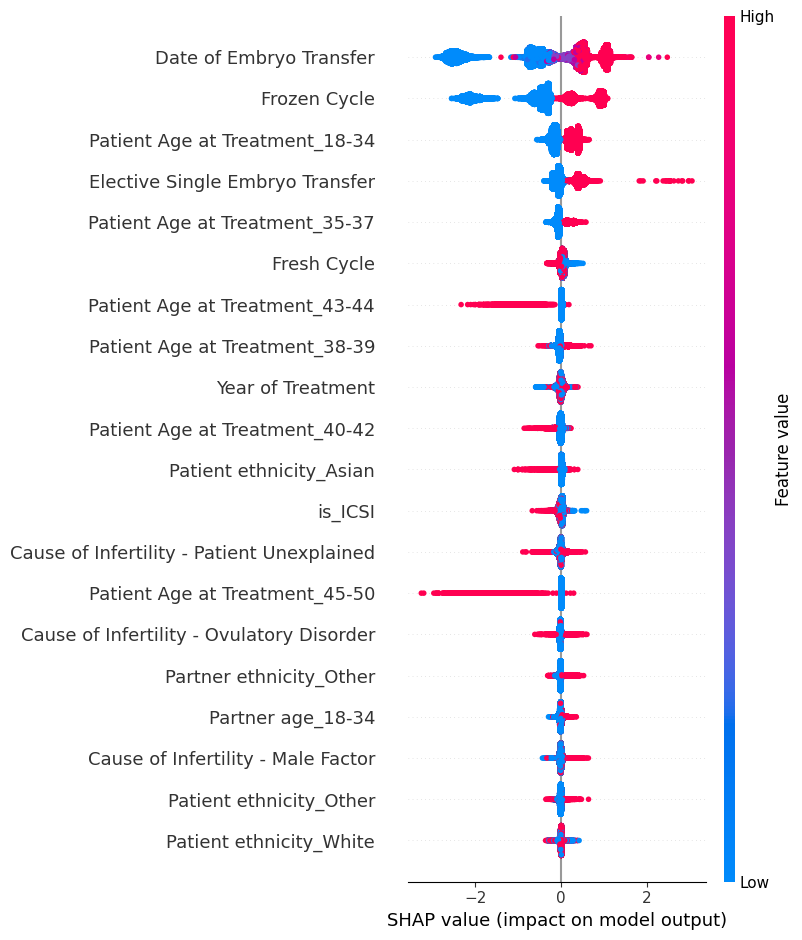

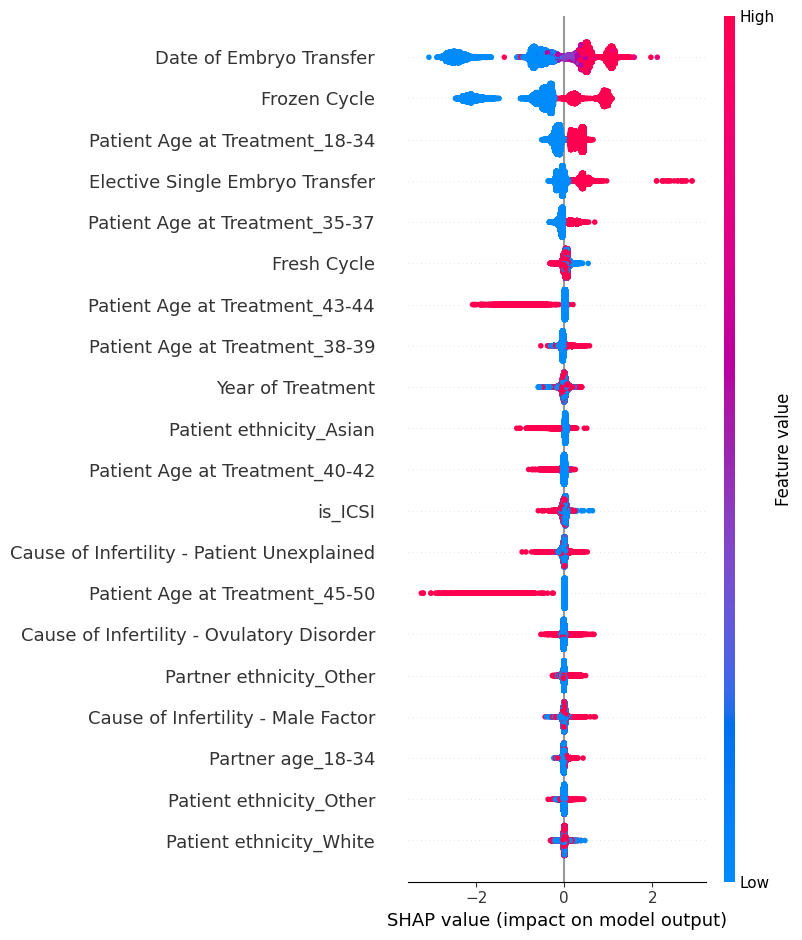

Model: LGBMClassifier
[LightGBM] [Info] Number of positive: 19985, number of negative: 58273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 78258, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.255373 -> initscore=-1.070157
[LightGBM] [Info] Start training from score -1.070157
Accuracy: 0.7419546508730569
Confusion Matrix:
[[38653    86]
 [13377    57]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     38739
           1       0.40      0.00      0.01     13434

    accuracy                           0.74     52173
   macro avg       0.57      0.50      0.43     52173
weighted avg       0.65      0.74      0.63     52173



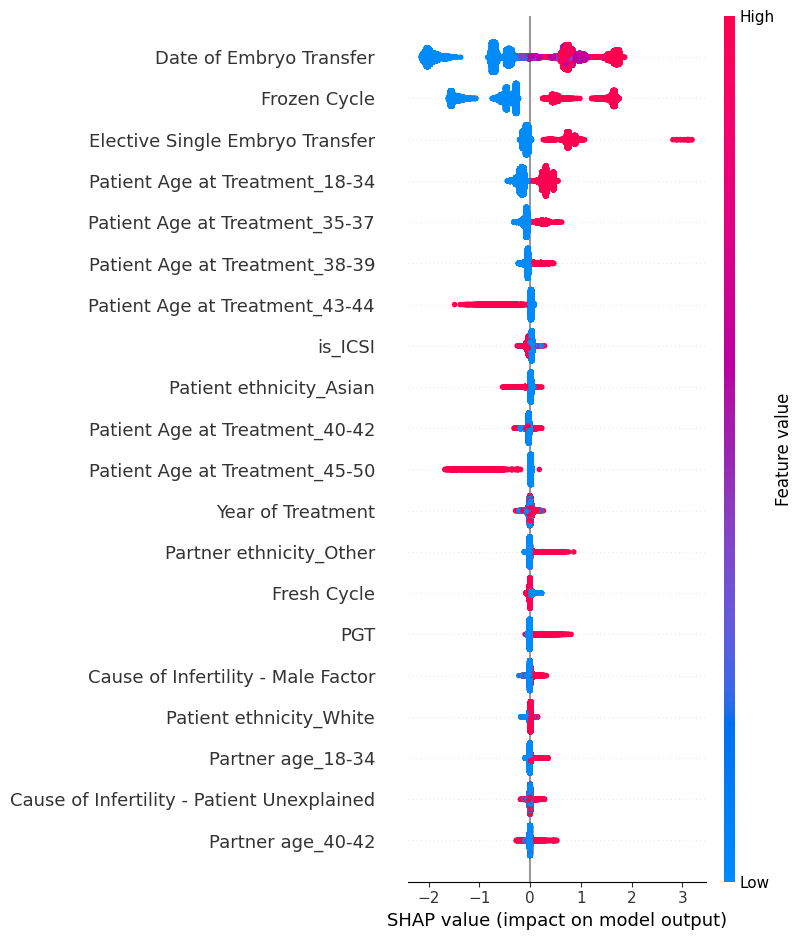

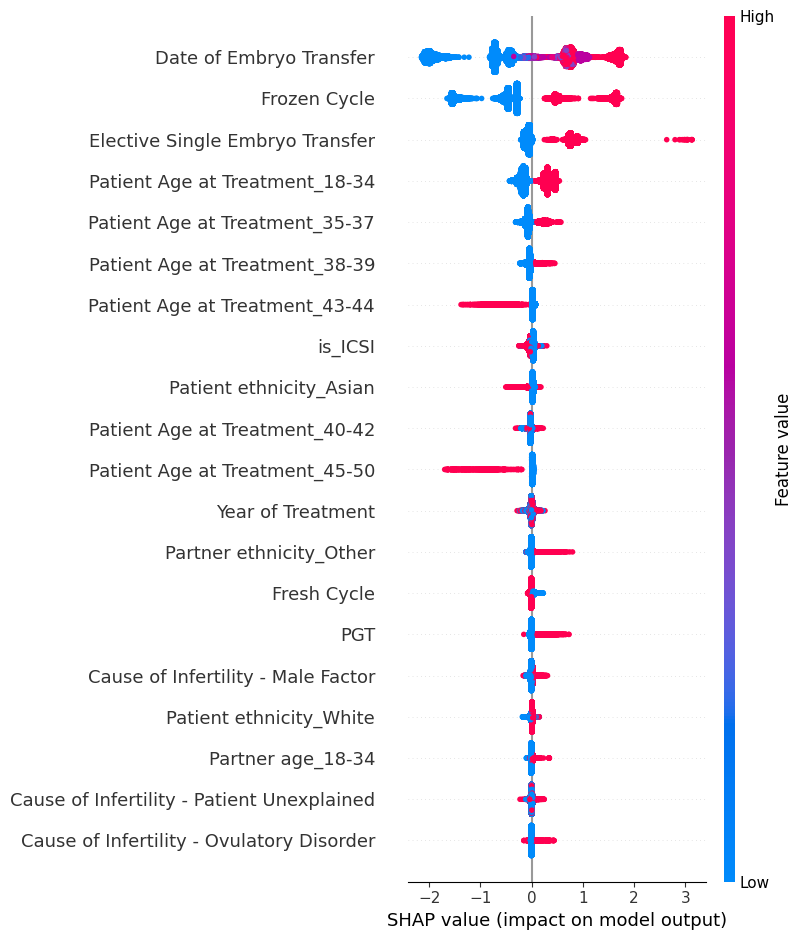

In [ ]:
for name, clf in classifiers.items():
    print(f"Model: {name}")
    model = train_evaluate_classifier(clf, X_train_scaled, y_train_class1, X_test_scaled, y_test_class1)

    # SHAP values and feature importance plot
    explainer = shap.Explainer(model)

    shap_values_train = explainer(X_train_scaled)

    shap.summary_plot(shap_values_train, X_train_scaled, feature_names=features.columns)

    shap_values = explainer(X_test_scaled)

    shap.summary_plot(shap_values, X_test_scaled, feature_names=features.columns)



Evaluating RandomForestClassifier...
Accuracy: 0.7154850209878673
Confusion Matrix:
[[35022  3783]
 [11061  2307]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83     38805
           1       0.38      0.17      0.24     13368

    accuracy                           0.72     52173
   macro avg       0.57      0.54      0.53     52173
weighted avg       0.66      0.72      0.67     52173



Evaluating LogisticRegression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7391562685680333
Confusion Matrix:
[[38267   538]
 [13071   297]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85     38805
           1       0.36      0.02      0.04     13368

    accuracy                           0.74     52173
   macro avg       0.55      0.50      0.45     52173
weighted avg       0.65      0.74      0.64     52173



Evaluating KNeighborsClassifier...
Accuracy: 0.6999022482893451
Confusion Matrix:
[[33250  5555]
 [10102  3266]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81     38805
           1       0.37      0.24      0.29     13368

    accuracy                           0.70     52173
   macro avg       0.57      0.55      0.55     52173
weighted avg       0.67      0.70      0.68     52173



Evaluating GradientBoostingClassifier...
Accuracy: 0.7434113430318364
Confusion Matrix:
[[38763    42]
 [13345    23]]
              precision    recal

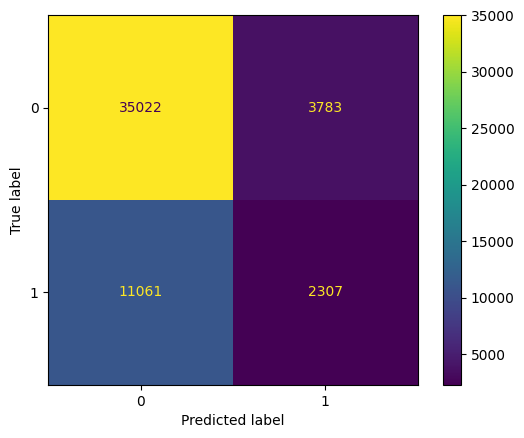

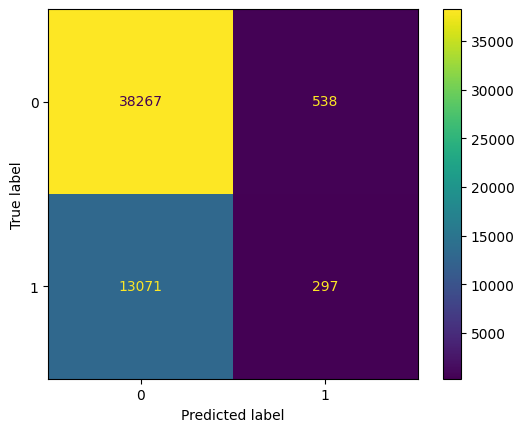

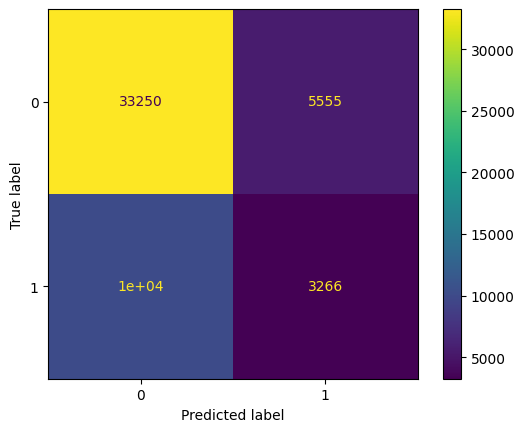

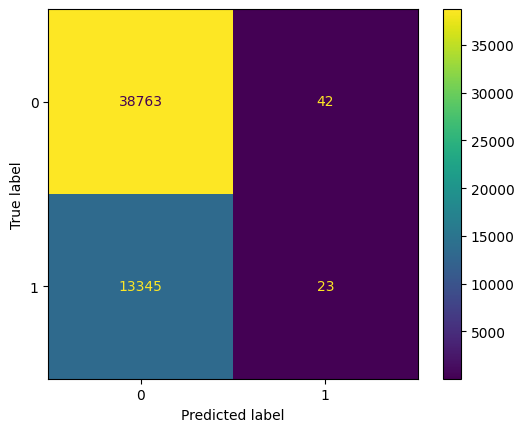

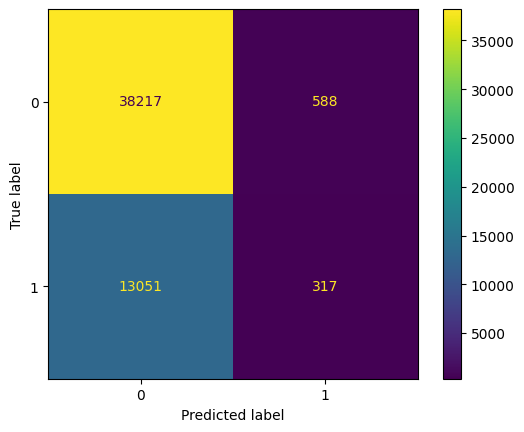

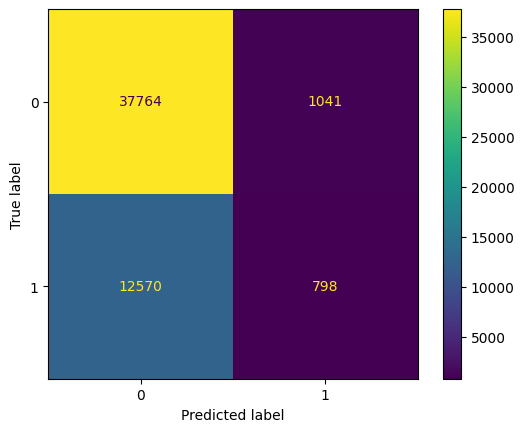

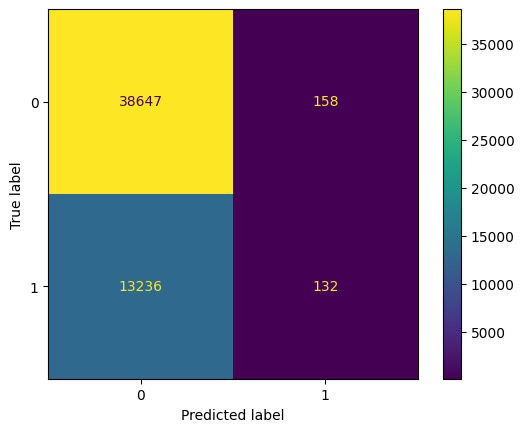

In [ ]:

classification_targets = ['Live Birth Occurrence']
regression_target = 'Birth Weight Lower Bound'

# Define features
features = df.drop(columns=classification_targets + [regression_target])

# Split data into train and test sets
X_train, X_test, y_train_class1, y_test_class1 = train_test_split(features, df['Live Birth Occurrence'], test_size=0.4, random_state=100)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(features, df[regression_target], test_size=0.4, random_state=100)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    #'SVC': SVC(probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LGBMClassifier': lgb.LGBMClassifier()
}

# Function to train and evaluate classifiers
def train_evaluate_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{cm}")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(cm).plot()
    return clf

# Iterate over classifiers and evaluate each one
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    trained_clf = train_evaluate_classifier(clf, X_train_scaled, y_train_class1, X_test_scaled, y_test_class1)
    print("\n" + "="*60 + "\n")


In [ ]:
import optuna
from sklearn.metrics import f1_score

#from optuna.integration import SklearnPruningCallback

In [ ]:
def objective_knn(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 50),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_int('p', 1, 2)  # 1 for Manhattan, 2 for Euclidean
    }
    clf = KNeighborsClassifier(**params)
    clf.fit(X_train_scaled, y_train_class1)
    y_pred = clf.predict(X_test_scaled)
    f1 = f1_score(y_test_class1, y_pred, pos_label=1)
    return f1

# Define the objective function for RandomForestClassifier
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }
    clf = RandomForestClassifier(**params)
    clf.fit(X_train_scaled, y_train_class1)
    y_pred = clf.predict(X_test_scaled)
    f1 = f1_score(y_test_class1, y_pred, pos_label=1)
    return f1



In [ ]:
# Run Optuna optimization for KNN
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

print("Best hyperparameters for KNN:")
print(study_knn.best_params)



[I 2024-07-12 23:16:23,573] A new study created in memory with name: no-name-5a7ddd27-9257-4d06-b4c4-4abb73af754b
[I 2024-07-12 23:16:52,255] Trial 0 finished with value: 0.200192275066448 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.200192275066448.
[I 2024-07-12 23:17:17,893] Trial 1 finished with value: 0.2734100663285212 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'p': 2}. Best is trial 1 with value: 0.2734100663285212.
[I 2024-07-12 23:21:08,633] Trial 2 finished with value: 0.17725712933380663 and parameters: {'n_neighbors': 25, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.2734100663285212.
[I 2024-07-12 23:25:02,484] Trial 3 finished with value: 0.10985121583535426 and parameters: {'n_neighbors': 34, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.2734100663285212.
[I 2024-07-12 23:28:53,717] Trial 4 finished with value: 0.12110257568910979 and parameters: {'n_neighbors': 47, 'weights'

Best hyperparameters for KNN:
{'n_neighbors': 1, 'weights': 'distance', 'p': 1}


In [ ]:

# Run Optuna optimization for RandomForestClassifier
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

print("Best hyperparameters for RandomForestClassifier:")
print(study_rf.best_params)




[I 2024-07-13 01:57:18,508] A new study created in memory with name: no-name-44e76049-685a-4f57-9001-60f964f69b81
[I 2024-07-13 01:57:28,960] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 311, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 0 with value: 0.0.
[I 2024-07-13 01:57:31,955] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 162, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 0 with value: 0.0.
[I 2024-07-13 01:57:32,289] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 21, 'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.0.
[I 2024-07-13 01:58:09,564] Trial 3 finished with value: 0.00342848624878885 and parameters: {'n_estimators': 463, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 3 with value: 0.003428486

Best hyperparameters for RandomForestClassifier:
{'n_estimators': 223, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}


In [ ]:
# Create the KNN and Random Forest models with the best hyperparameters
best_knn = KNeighborsClassifier(**study_knn.best_params)
best_rf = RandomForestClassifier(**study_rf.best_params)


In [ ]:
# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('knn', best_knn),
    ('rf', best_rf)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train_class1)

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
f1_ensemble = f1_score(y_test_class1, y_pred_ensemble, pos_label=1)
print(f"Ensemble Model F1 Score: {f1_ensemble}")

Ensemble Model F1 Score: 0.34185784129371943
